## Python Code

In [1]:
import numpy as np
from ipywidgets import*

def f_calc(N_trail):
    N_hit = 0
    for i in range(N_trail):
        x = np.random.random()
        y = np.random.random()


        if((x*x+y*y)<=1.000):
            N_hit += 1

    print("Hits = ",N_hit,"Trails = ",N_trail)
    pi = 4.*N_hit/N_trail
    print("Pi = ",pi) 
    
    
interactive(f_calc,N_trail = IntSlider(value = 100,min = 0,max = 50000,step = 100,layout = {'width':'700px'}))    

interactive(children=(IntSlider(value=100, description='N_trail', layout=Layout(width='700px'), max=50000, ste…

as we see the $\pi$ value is very approximate, and becomes exact when we take infinite Trails.
You can go on without hesitation to increase N_trails by just moving upper slider but in the end you will be able to understand i.e.



<i> One must not stop a stochastic calculation simply because the result is just right, nor one should continue to play because the result is not close enough to what we think the answer should be !! </i> -- Werner Krauth.







## Calculating $\pi$

As i told you earlier this is the problem based on Direct Sampling . Therefore we will not get the same result for the same value of trial . So the question comes, how should we arrive at the <b> good value </b> of $\pi$. 


Clearly you must have guessed it, we are going to look it at as a statistical point of view i.e. you calculate $\pi$ for large number of time (taking same numbers of trails in each time) and store them in an array , then plot the histogram. 


Because it's a random sampling you will get a cute distribution in the end and your $\pi$ will be the mean value of that curve!!

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 322.93it/s]


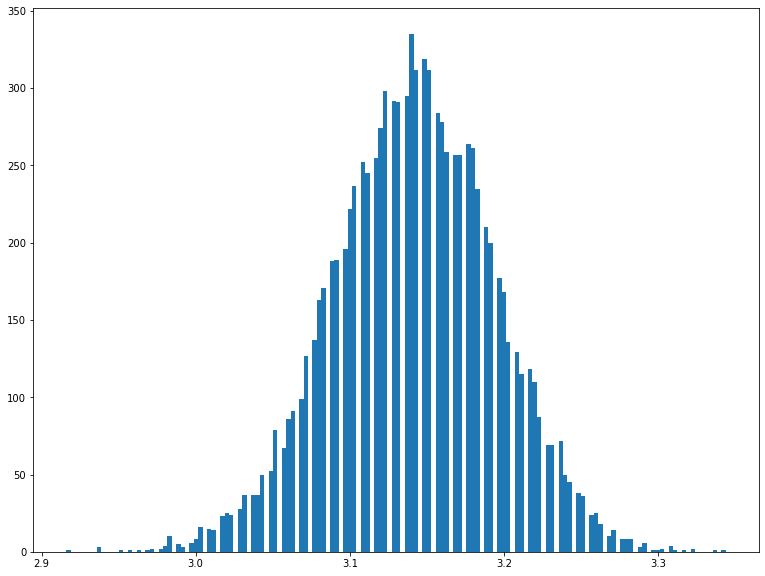

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.figure(figsize = (13,10))
N_iter = 10000
N_trail = 1000
Pi_array = []
for i in tqdm(range(N_iter)):

    N_hit = 0
    for i in range(N_trail):
        x = np.random.random()
        y = np.random.random()


        if((x*x+y*y)<=1.000):
            N_hit += 1
            

    pi = 4.*N_hit/N_trail
    Pi_array.append(pi)

    
    
plt.hist(Pi_array,bins = 150)
plt.show()

# Exercise
As you have seen in the upper cell we get a cute Normal distribution curve but it is <b>actually a Binomial Distribution</b>. It approaches Gaussian distribution when $N_{trail} $ tends to very large.

Now let me explain what we are going to do in this exercise :

<i> As we know we get a binomial distribution curve for pi values for different $N_{trail}$. you have to find the value of $\sigma_{\pi}$ (i.e. width of the distribution) from the sampling data and plot it vs $\frac{1}{\sqrt{N}}$. see whether the result agrees with the mathematical relation i.e. $$\sigma \sqrt{N} = 1.642 $$
    
    
from the first figure  of this article we have  
    

\begin{equation*}
\frac{N_{hits}}{N} = \frac{\pi}{4} \\
\end{equation*}

clearly $N_{hits}$ is  a random variable here (say X)

\begin{equation*}
<\pi> = 4 \frac{<X>}{N}
\end{equation*}

which further gives 

\begin{align}
\sigma_{\pi}^2 = \frac{16}{N^2}\sigma_{x}^2
\end{align}


   
   
   
    
    
    
    
    

this $\sigma_{x}$ is what we will calculate from the code i.e. you find the variance of   $N_{hits}$ array for different value of $N_{trail}$. But before writing code i want to derive how do we get $eq(1)$ relation


as i explained earlier N_hit is a random variable here and it can take only discrete values. i.e. if N_trail have been performed then $ X \in ( 0,1,2,.....N_{trail} ) $


and probability of getting *a hit*
\begin{equation*}
P(hit) = \pi/4
\end{equation*}

for obtaining X hits one can obtain the following binomial distribution which is 


\begin{equation}\label{eq:}
f(X) = \binom N X \bigg (\frac{\pi}{4} \bigg )^X\bigg (1-\frac{\pi}{4} \bigg )^{N-X}
\end{equation}

and we knwo for binomial distribution 
\begin{equation*}
\sigma_{x} = N*P(hit)*[1-P(hit)]
\end{equation*}

putting in eq.2 we get,
$$ \sigma_{\pi} = \frac{\sqrt{\pi(4-\pi)}}{\sqrt{N}}$$
QED


# Python code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm




NT_array= np.arange(100,5001,1000)
Sigma_array = []

N_hit_variance = []
niter = int(len(NT_array))
N_sample = 4000 ## number of times we will calculate N_hit for the same value of N_tail
for i in tqdm(range(niter)):
    N_tail = NT_array[i]
    
    N_hit_array = []
         
    for j in range(N_sample):
        N_hit = 0
        
        for k in range(N_tail):
            
            x = np.random.random()
            y = np.random.random()


            if((x*x+y*y)<=1.0):
                
                N_hit += 1
        N_hit_array.append(N_hit)

    var = np.var(N_hit_array)
    N_hit_variance.append(var)
    
    
            

            
        
    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:44<00:00, 20.93s/it]


## Plotting Graphs

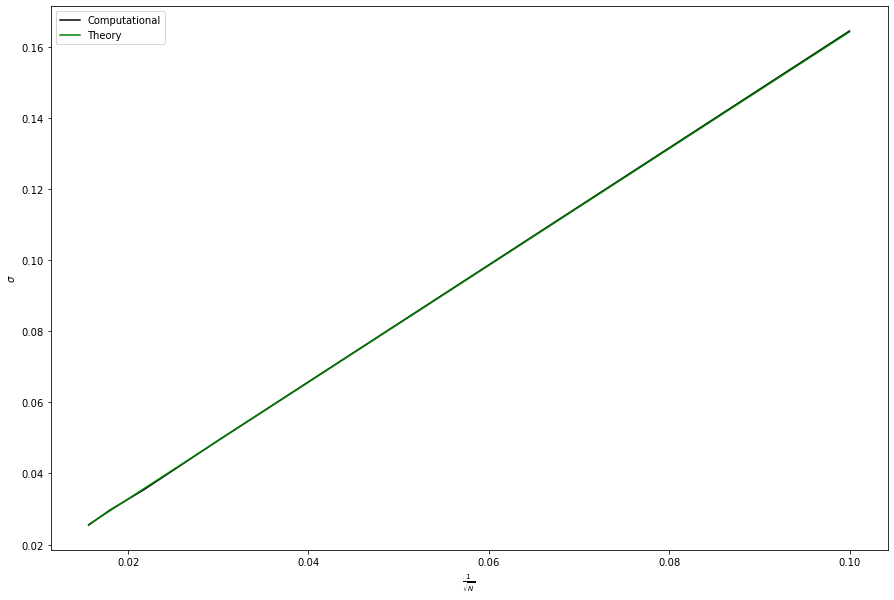

In [5]:
plt.figure(figsize =(15,10))
## COmputational 
Y = 1.0/(np.sqrt(NT_array))
X1 = (4.0/(NT_array))*np.sqrt(N_hit_variance)
plt.plot(Y,X1,'k',label = "Computational")

### Theory 

X2 = Y*np.sqrt(np.pi*(4.0-np.pi))
plt.plot(Y,X2,'g',label = "Theory")

plt.xlabel(r'$\frac{1}{\sqrt{N}}$')
plt.ylabel(r'$\sigma$')
plt.legend()
plt.show()

## Finding slope with SCIPY 

In [6]:
from scipy.optimize import curve_fit

def func(x, a):
    return a*x

popt, pcov = curve_fit(func,Y,X1)
print("slope =  ",popt[0])

slope =   1.6439530497843764


# $VOILA !!!$